In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import pywt

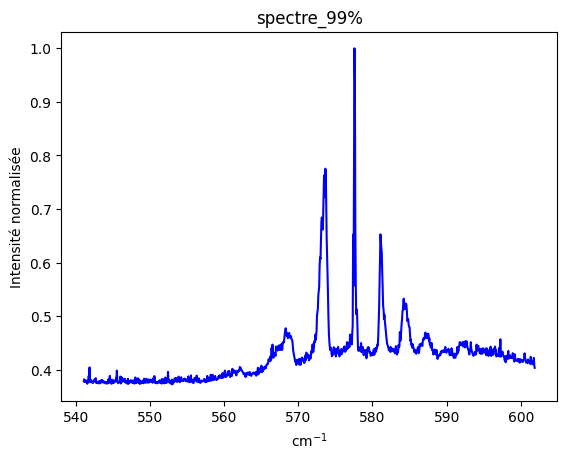

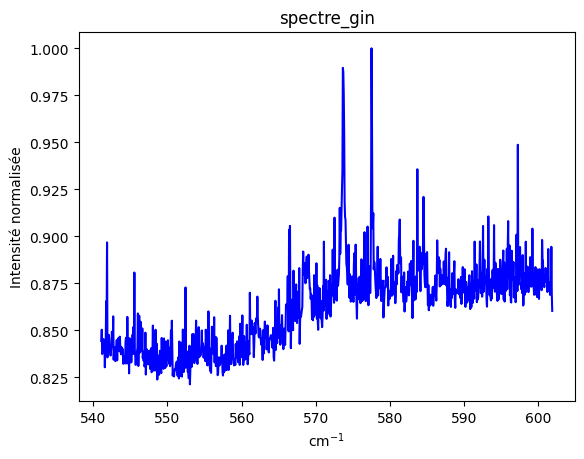

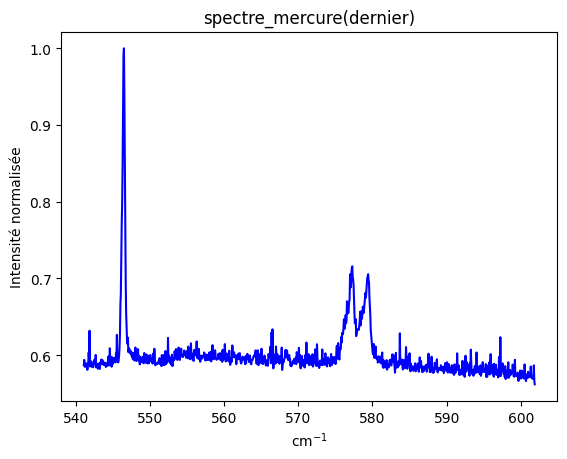

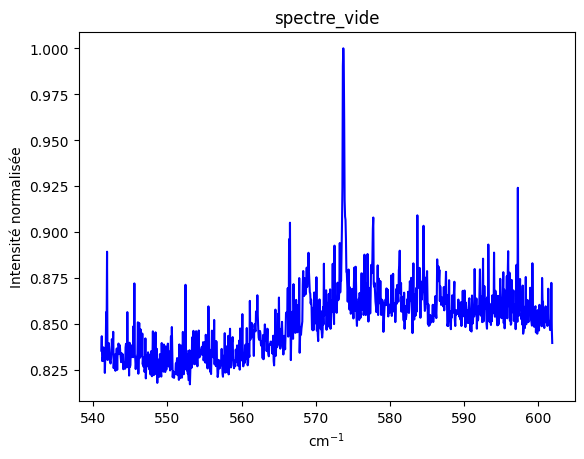

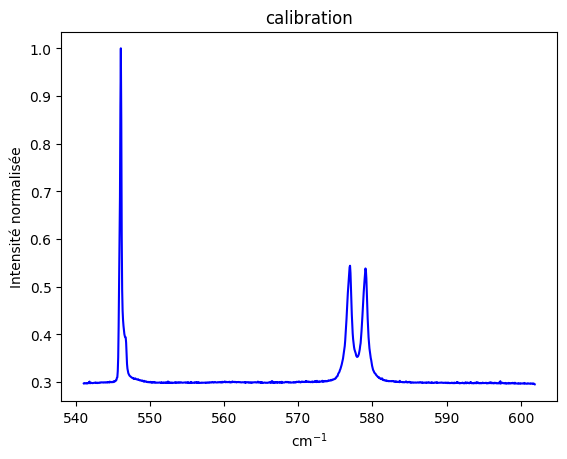

In [8]:


def plot_spectrometer_data(file_path):
    # Load data using NumPy
    data = np.loadtxt(file_path)

    # Extract y and x points from the loaded data
    y_points = data[0, :]
    x_points = data[1, :]

    # Normalize y points by dividing by the max value
    y_points_normalized = y_points / np.max(y_points)

    # Plot the normalized data with smaller marker size
    plt.plot(x_points, y_points_normalized, marker='', linestyle='-', color='b', markersize=3)
    plt.title(f'{file_path}')
    plt.xlabel(r'cm$^{-1}$')
    plt.ylabel('Intensité normalisée')
    plt.show()
    return [x_points, y_points]

# Provide the path to your .txt file
file_paths = ['spectre_99%', 'spectre_gin', 'spectre_mercure(dernier)', 'spectre_vide', 'calibration']

# Call the function to plot the normalized data
for files in file_paths:
    plot_spectrometer_data(files)


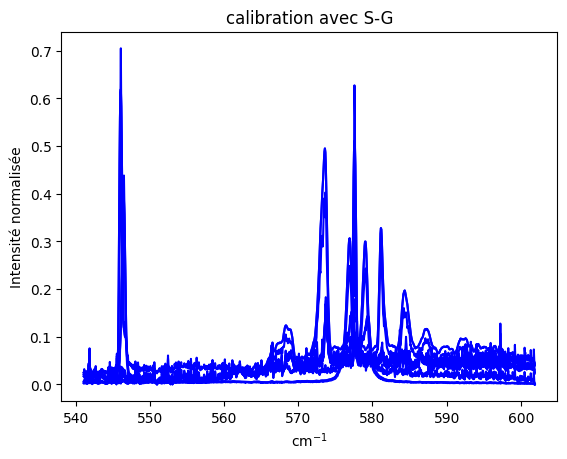

In [20]:
# Filtered data

def filter_data(file_path, filter_type):
    # Load data using NumPy
    data = np.loadtxt(file_path)

    
    # Extract y and x points from the loaded data
    y_points = data[0, :]
    x_points = data[1, :]

    # Solution 1 : Medfit
    if filter_type == 'medfit':
        y_points_filtered = medfilt(y_points, kernel_size=13)

    #Solution 2 : Apply Savitzky-Golay filter
    if filter_type == 's-g' or 'S-G':
        window_length = 13  # Adjust window length (odd number)
        poly_order = 3  # Adjust polynomial order
        y_points_filtered = savgol_filter(y_points, window_length, poly_order)

    if filter_type == 'nofit':
        y_points_filtered= y_points

    # Normalize y points by dividing by the max value
    y_points_normalized = y_points_filtered / np.max(y_points_filtered)

    # Remove baseline

    y_points_baseline = y_points_normalized - np.min(y_points_normalized)

    # Plot the normalized data with smaller marker size
    plt.plot(x_points, y_points_baseline, marker='', linestyle='-', color='b', markersize=3)
    plt.title(f'{file_path} avec {filter_type}')
    plt.xlabel(r'cm$^{-1}$')
    plt.ylabel('Intensité normalisée')
    # plt.show()
    return [x_points, y_points]


# Call the function to plot the normalized data
filter_type = ['nofit', 'medfit', 'S-G' ]
for files in file_paths:
    for ftype in filter_type:
        filter_data(files, ftype)

        


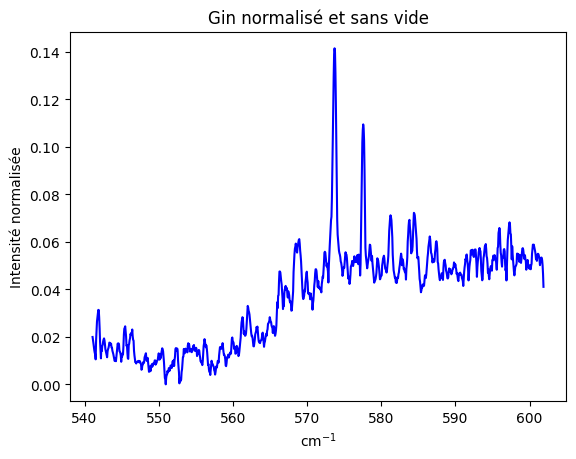

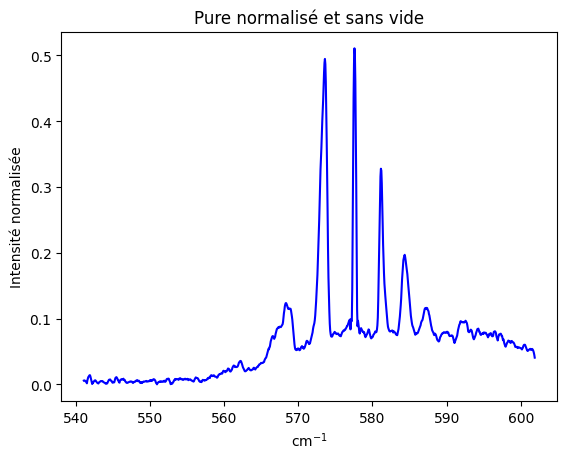

In [27]:
window_length = 13  # Adjust window length (odd number)
poly_order = 3  # Adjust polynomial order



gin_data = np.loadtxt('spectre_gin')
ginx = gin_data[1, :]
giny = gin_data[0, :]

vide_data = np.loadtxt('spectre_vide')
videx = vide_data[1, :]
videy = vide_data[0, :]

pure_data = np.loadtxt('spectre_99%')
purex = pure_data[1, :]
purey = pure_data[0, :]

giny_filtered = savgol_filter(giny, window_length, poly_order)
videy_filtered = savgol_filter(videy, window_length, poly_order)
purey_filtered = savgol_filter(purey, window_length, poly_order)

giny_normalized = giny_filtered / np.max(giny_filtered)
videy_normalized = videy_filtered / np.max(videy_filtered)
purey_normalized = purey_filtered/ np.max(purey_filtered)


giny_baseline = giny_normalized - np.min(giny_normalized)
videy_baseline = videy_normalized - np.min(videy_normalized)
purey_baseline = purey_normalized - np.min(purey_normalized)

giny_woVide = giny_baseline - videy_baseline
purey_woVide = purey_baseline - videy_baseline


plt.plot(ginx, giny_baseline, marker='', linestyle='-', color='b', markersize=3)
plt.title(f'Gin normalisé et sans vide')
plt.xlabel(r'cm$^{-1}$')
plt.ylabel('Intensité normalisée')
plt.show()

plt.plot(purex, purey_baseline, marker='', linestyle='-', color='b', markersize=3)
plt.title(f'Pure normalisé et sans vide')
plt.xlabel(r'cm$^{-1}$')
plt.ylabel('Intensité normalisée')
plt.show()
